In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [75]:
df = pd.read_csv('CW-survey.csv', usecols=[1, 2, 5, 11])
df.columns = ['Gender', 'Year', 'Recommend', 'Regret']

In [76]:
df.describe()

,Gender,Year,Recommend,Regret
count,24,24,24,24
unique,2,3,4,3
top,Male,3rd year,Not likely,No
freq,17,18,10,13


In [77]:
df.head()

,Gender,Year,Recommend,Regret
0,Female,3rd year,Not likely,Prefer not to say
1,Female,3rd year,Not likely,Yes
2,Female,Masters,Likely,No
3,Male,3rd year,Likely,No
4,Male,3rd year,Not likely,Yes


In [78]:
df['Gender'] = df['Gender'].astype('category')

In [79]:
genderCounts = df['Gender'].value_counts(ascending=True)
genderCounts

Female     7
Male      17
Name: Gender, dtype: int64

(0, 18)

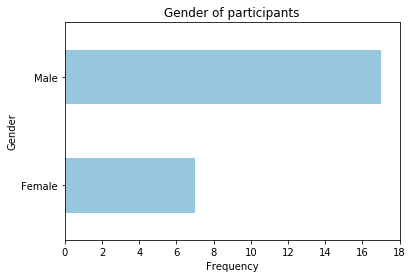

In [69]:
genderBar = genderCounts.plot.barh(color=plt.cm.Blues(100))

genderBar.set_title('Gender of participants')
genderBar.set_xlabel('Frequency')
genderBar.set_ylabel('Gender')
genderBar.set_xlim(0, 18)

In [80]:
yearLevels = ['1st year', '3rd year', 'Masters']
df['Year']= df['Year'].astype(pd.CategoricalDtype(categories=yearLevels,ordered=True))

yearCounts = df['Year'].value_counts(sort=False)
yearCounts

1st year     2
3rd year    18
Masters      4
Name: Year, dtype: int64

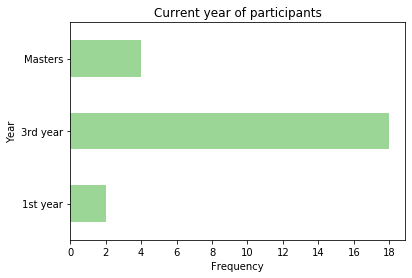

In [71]:
yearBar = yearCounts.plot.barh(color=plt.cm.Greens(100))

yearBar.set_title('Current year of participants')
yearBar.set_xlabel('Frequency')
yearBar.set_ylabel('Year')
yearBar.set_xticks(np.arange(0, 20, step=2))
#plt.savefig('years.png', dpi=300, bbox_inches='tight')

In [81]:
opinLevels = ['Yes','No','Prefer not to say']
df['Regret']= df['Regret'].astype(pd.CategoricalDtype(categories=opinLevels,ordered=True))

opinionsCount = df['Regret'].value_counts(sort=False)
opinionsCount

Yes                   6
No                   13
Prefer not to say     5
Name: Regret, dtype: int64

Text(0, 0.5, 'Regret options')

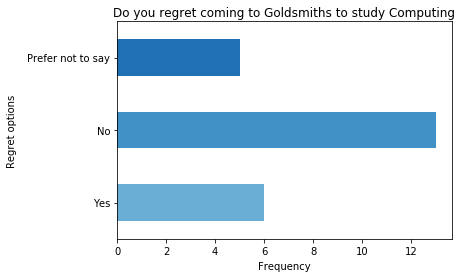

In [73]:
opinionsBar = opinionsCount.plot.barh(color=plt.cm.Blues(np.linspace(0.5, 1.0, 5)))

opinionsBar.set_title('Do you regret coming to Goldsmiths to study Computing', pad=5)
opinionsBar.set_xlabel('Frequency', labelpad = 5)
opinionsBar.set_ylabel('Regret options', labelpad=10)

In [82]:
#Regret
oftenLevels = ['Yes', 'No', 'Prefer not to say'] 
df['Regret']=df['Regret'].astype(pd.CategoricalDtype(categories=oftenLevels,ordered=True))

engagCount = df['Regret'].value_counts(sort=False)
engagCount

Yes                   6
No                   13
Prefer not to say     5
Name: Regret, dtype: int64

In [37]:
#2 cat. variables (Opinion & Gender)
opinLevels = ['Very likely','Likely','Not likely','Would not recommend']
df['Recommend']= df['Recommend'].astype(pd.CategoricalDtype(categories=opinLevels,ordered=True))

table=pd.crosstab(df['Recommend'], df['Gender'],margins=True)
#table=table.sort_values(by='All', ascending=False)
table.drop(index='All', inplace=True)
table

Gender,Female,Male,All
Recommend,,,
Very likely,1,1,2
Likely,1,9,10
Not likely,5,5,10
Would not recommend,0,2,2


Text(0, 0.5, 'Recommendation Level')

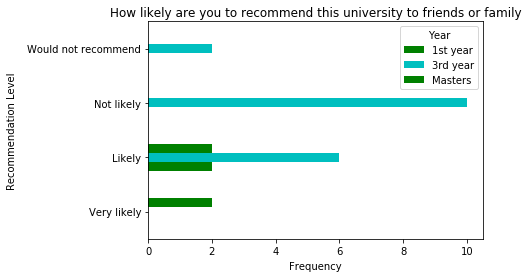

In [83]:
table.drop('All', axis='columns', inplace=True)
#twoCatVar = table.plot.barh(colormap='RdBu')
twoCatVar = table.plot.barh(color='gc')

twoCatVar.set_title('How likely are you to recommend this university to friends or family', pad=5)
twoCatVar.set_xlabel('Frequency', labelpad = 5)
twoCatVar.set_ylabel('Recommendation Level', labelpad=10)
#plt.savefig('comfortwithgender.png', dpi=300, bbox_inches='tight')

In [54]:
#2 cat. variables (Opinion & year)
opinLevels = ['Very likely','Likely','Not likely','Would not recommend']
df['Recommend']= df['Recommend'].astype(pd.CategoricalDtype(categories=opinLevels,ordered=True))

table = pd.crosstab(df['Recommend'], df['Year'],margins=True)
#table=table.sort_values(by='All', ascending=False)
table.drop(index='All', inplace=True)
table

Year,1st year,3rd year,Masters,All
Recommend,,,,
Very likely,0,0,2,2
Likely,2,6,2,10
Not likely,0,10,0,10
Would not recommend,0,2,0,2


Text(0, 0.5, 'Recommendation Level')

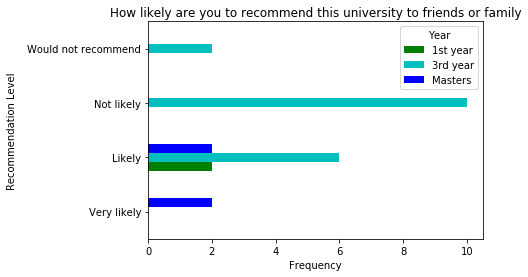

In [84]:
#table.drop('All', axis='columns', inplace=True)
#twoCatVar = table.plot.barh(color=plt.cm.Greens(np.linspace(0.3, 1, 3)))
twoCatVar = table.plot.barh(color='gcbr')

twoCatVar.set_title('How likely are you to recommend this university to friends or family', pad=5)
twoCatVar.set_xlabel('Frequency', labelpad = 4)
twoCatVar.set_ylabel('Recommendation Level', labelpad=10)
# plt.savefig('comfort&year.png', dpi=300, bbox_inches='tight')